In [1]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7, 7)

# Librairie `pandas` & `matplotlib`

<div class="alert alert-block alert-danger">
    Si vous utilisez ce notebook via mybinder, pensez à télécharger votre fichier à la fin de la séance afin de conserver une trace de votre travail !
</div>

## À la découverte des planètes extrasolaires

Le fichier [`planets.csv`](https://raw.githubusercontent.com/xgarrido/master_python_teaching/master/td/data/planets.csv) contient des informations relatives aux planètes extrasolaires depuis la première "découverte" en 1989. Le document fait notamment référence aux techniques de découverte de ces objets et recense les informations glanées par leurs découvreurs : période orbitale en jours, masse de la planète, distance à l'objet en années lumières et année de découverte. Dans cet exercice, on utilisera le module `pandas` plus à même de traiter des fichiers de données mélant données numériques et alphanumériques.

- Après avoir lu le fichier, afficher un premier résumé des propriétés statistiques du fichier.

In [2]:
import pandas as pd
planets = pd.read_csv("data/planets.csv")
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.0,498.000000,498.000000,498.000000,498.000000
mean,1.0,835.778671,2.509320,52.068213,2007.377510
std,0.0,1469.128259,3.636274,46.596041,4.167284
min,1.0,1.328300,0.003600,1.350000,1989.000000
25%,1.0,38.272250,0.212500,24.497500,2005.000000
50%,1.0,357.000000,1.245000,39.940000,2009.000000
75%,1.0,999.600000,2.867500,59.332500,2011.000000
max,1.0,17337.500000,25.000000,354.000000,2014.000000


- Faire de même en ayant au préalable regroupé les données par méthode de détection.

In [3]:
by_method = planets.groupby("method")
by_method.mean()

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,1.0,631.180000,NaN,17.875000,2011.500000
Eclipse Timing Variations,1.0,4751.644444,5.125000,315.360000,2010.000000
Imaging,1.0,118247.737500,NaN,67.715937,2009.131579
Microlensing,1.0,3153.571429,NaN,4144.000000,2009.782609
Orbital Brightness Modulation,1.0,0.709307,NaN,1180.000000,2011.666667
Pulsar Timing,1.0,7343.021201,NaN,1200.000000,1998.400000
Pulsation Timing Variations,1.0,1170.000000,NaN,NaN,2007.000000
Radial Velocity,1.0,823.354680,2.630699,51.600208,2007.518987
Transit,1.0,21.102073,1.470000,599.298080,2011.236776


- Représenter le nombre de planètes découvertes en fonction du temps.

La méthode `size` retourne ici le nombre d'occurences indépendamment de la valeur alors que la méthode `count` ne comptabilise que les valeurs définies et exclue donc les `NaN`. 

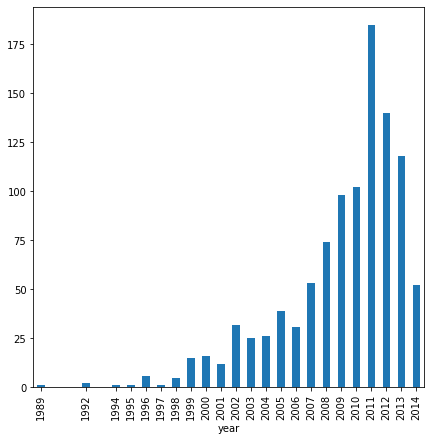

In [4]:
by_year = planets.groupby("year")
by_year.size().plot(kind="bar");

- Représenter cette même information en fonction de la méthode utilisée pour la découverte.

In [5]:
by_method_year = planets.groupby(["method", "year"])
by_method_year_unstack = by_method_year.size().unstack()
by_method_year_unstack

year,1989,1992,1994,1995,1996,1997,1998,1999,2000,2001,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
method,,,,,,,,,,,,,,,,,,,,,
Astrometry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
Eclipse Timing Variations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,1.0,2.0,3.0,1.0,NaN,NaN
Imaging,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,4.0,1.0,8.0,3.0,6.0,3.0,2.0,7.0,NaN
Microlensing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,NaN,4.0,2.0,2.0,1.0,6.0,4.0,NaN
Orbital Brightness Modulation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN
Pulsar Timing,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Pulsation Timing Variations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Radial Velocity,1.0,NaN,NaN,1.0,6.0,1.0,5.0,15.0,16.0,12.0,...,36.0,21.0,35.0,43.0,74.0,43.0,94.0,38.0,29.0,11.0
Transit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,16.0,17.0,18.0,48.0,80.0,92.0,75.0,40.0


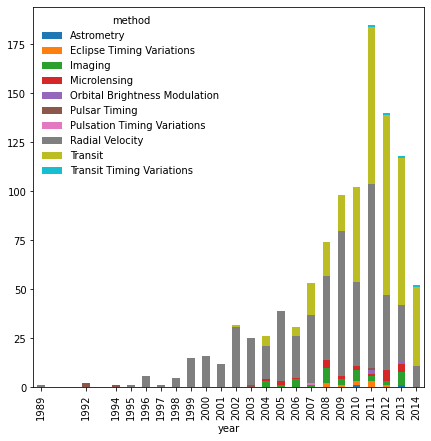

In [6]:
by_method_year_unstack.T.plot.bar(stacked=True);

-  Pour les deux principales méthodes, représenter la variation de la période orbitale en fonction
   de la distance à la planète. Finalement, ajouter à la figure précédente, deux sous-figures,
   présentant les distributions de période orbitale et de distance pour chacune des deux
   méthodes. Les trois représentations doivent figurer sur la même figure et conclure quant aux
   caractéristiques des objets extrasolaires mis en évidence par chacune des deux méthodes.

In [7]:
subdata = planets.set_index("method").loc[["Radial Velocity", "Transit"]]
subdata.head()

,number,orbital_period,mass,distance,year
method,,,,,
Radial Velocity,1,269.300,7.10,77.40,2006
Radial Velocity,1,874.774,2.21,56.95,2008
Radial Velocity,1,763.000,2.60,19.84,2011
Radial Velocity,1,326.030,19.40,110.62,2007
Radial Velocity,1,516.220,10.50,119.47,2009


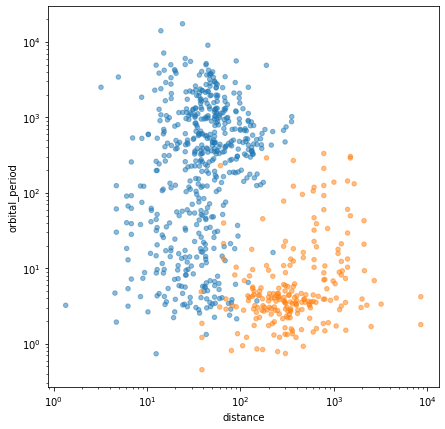

In [8]:
import numpy as np

colors = np.where(subdata.index == "Transit", "tab:orange", "tab:blue")
ax = subdata.plot.scatter(x="distance", y="orbital_period", c=colors, alpha=0.5, loglog=True)

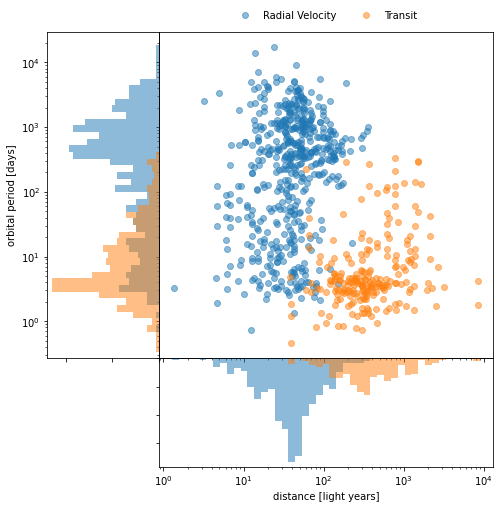

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
grid = plt.GridSpec(4, 4, hspace=0, wspace=0)
main = plt.subplot(grid[:-1, 1:], xticklabels=[], yticklabels=[], xscale="log", yscale="log")

selected_methods = ["Radial Velocity", "Transit"]
methods = {k: None for k in selected_methods}
for method in selected_methods:
    methods[method] = {"x": subdata.loc[method].distance, "y": subdata.loc[method].orbital_period}

for method, xy in methods.items():
    main.plot(xy["x"], xy["y"], "o", alpha=0.5, label=method)
main.legend(ncol=2, bbox_to_anchor=(0.5, 1.05), loc="center")

xlims = main.get_xlim()
x_hist = plt.subplot(
    grid[-1, 1:], yticklabels=[], xlim=xlims, xscale="log", xlabel="distance [light years]"
)
x_hist.invert_yaxis()

ylims = main.get_ylim()
y_hist = plt.subplot(
    grid[:-1, 0], xticklabels=[], ylim=ylims, yscale="log", ylabel="orbital period [days]"
)
y_hist.invert_xaxis()

kwargs = dict(alpha=0.5, histtype="stepfilled")
for method, xy in methods.items():
    x, y = xy["x"], xy["y"]
    x_hist.hist(
        x,
        orientation="vertical",
        **kwargs,
        bins=np.logspace(np.log10(xlims[0]), np.log10(xlims[1]), 50)
    )
    y_hist.hist(
        y,
        orientation="horizontal",
        **kwargs,
        bins=np.logspace(np.log10(ylims[0]), np.log10(ylims[1]), 50)
    )

---

## *Iris setosa, Iris virginica et Iris versicolor*

Le jeu de données *Iris* contient les propriétés morphologiques de 3 espèces de fleur d'iris collectées par Edgar Anderson. Ce jeu de données est surtout reputé par l'utilisation faite en 1936 par Ronald Fisher pour démontrer la puissance de son algorithme d'analyse discriminante linéaire à même de séparer les 3 espèces de fleur d'iris. Ces données sont devenues depuis un cas typique pour de nombreuses techniques de classification automatique en *machine learning*.

- Télécharger le fichier [`iris.csv`](https://raw.githubusercontent.com/xgarrido/master_python_teaching/master/td/data/iris.csv). Charger ce fichier dans un `pandas.DataFrame` et créer une
  nouvelle colonne associant la variété d'iris à une couleur (0, 1, 2 ou `red, green, blue` ou ...)

In [10]:
import numpy as np
import pandas as pd

df = pd.read_csv("./data/iris.csv")
df["colors"] = np.where(
    df.variety == "Setosa", "C0", np.where(df.variety == "Versicolor", "C1", "C2")
)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,variety,colors
0,5.1,3.5,1.4,0.2,Setosa,C0
1,4.9,3.0,1.4,0.2,Setosa,C0
2,4.7,3.2,1.3,0.2,Setosa,C0
3,4.6,3.1,1.5,0.2,Setosa,C0
4,5.0,3.6,1.4,0.2,Setosa,C0


- Représenter les distributions normalisées de longueur et de largeur des sépales et des pétales
  pour les 3 espèces

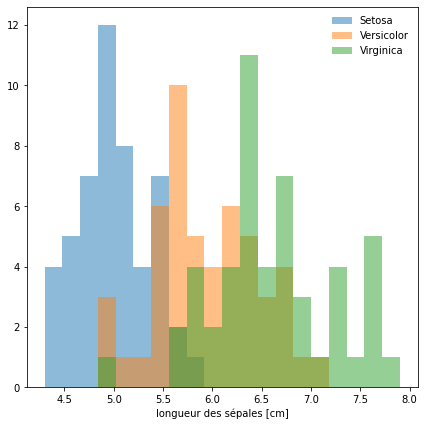

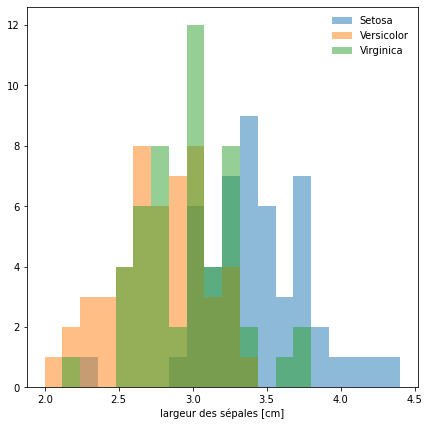

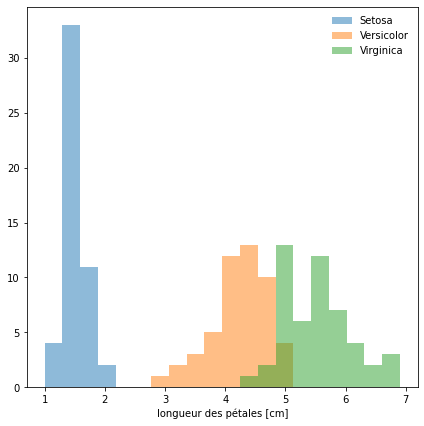

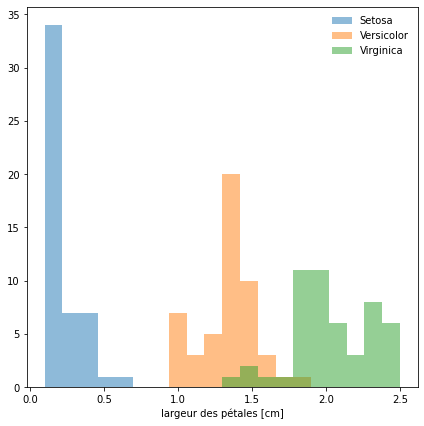

In [11]:
import matplotlib.pyplot as plt

kwargs = dict(histtype="stepfilled", alpha=0.5, bins=20)

labels = {
    "longueur des sépales [cm]": df.sepal_length,
    "largeur des sépales [cm]": df.sepal_width,
    "longueur des pétales [cm]": df.petal_length,
    "largeur des pétales [cm]": df.petal_width,
}

for xlabel, data in labels.items():
    # Determine best range and bin probability
    r = (np.min(data), np.max(data))
    plt.figure()
    for s in df.variety.unique():
        plt.hist(data[df.variety == s], **kwargs, label=s, range=r)
    plt.xlabel(xlabel)
    plt.legend()

-  Représenter dans un diagramme (largeur des sépales *vs.* longueur des sépales), la largeur des pétales ainsi que l'espèce de fleur d'iris considérée

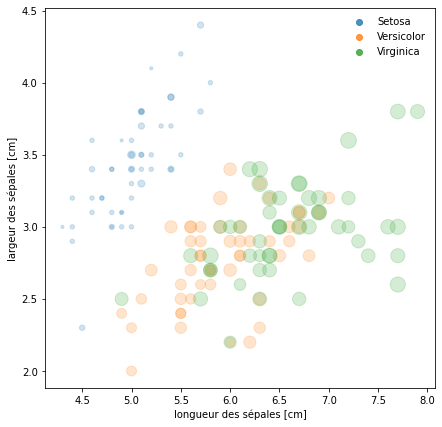

In [12]:
plt.scatter(df.sepal_length, df.sepal_width, s=100 * df.petal_width, c=df["colors"], alpha=0.2)
plt.xlabel("longueur des sépales [cm]")
plt.ylabel("largeur des sépales [cm]")

# Création d'une légende à partir d'un scatter plot vide
for i, v in enumerate(df.variety.unique()):
    plt.scatter([], [], c="C{}".format(i), alpha=0.8, label=v)
plt.legend();

- Représenter l'ensemble des combinaisons possibles de données (largeur des sépales /vs./ longueur
  des sépales, largeur des sépales /vs./ largeur des pétales...), les figures situées dans la
  diagonale devant correspondre aux distributions normalisées des différentes grandeurs.

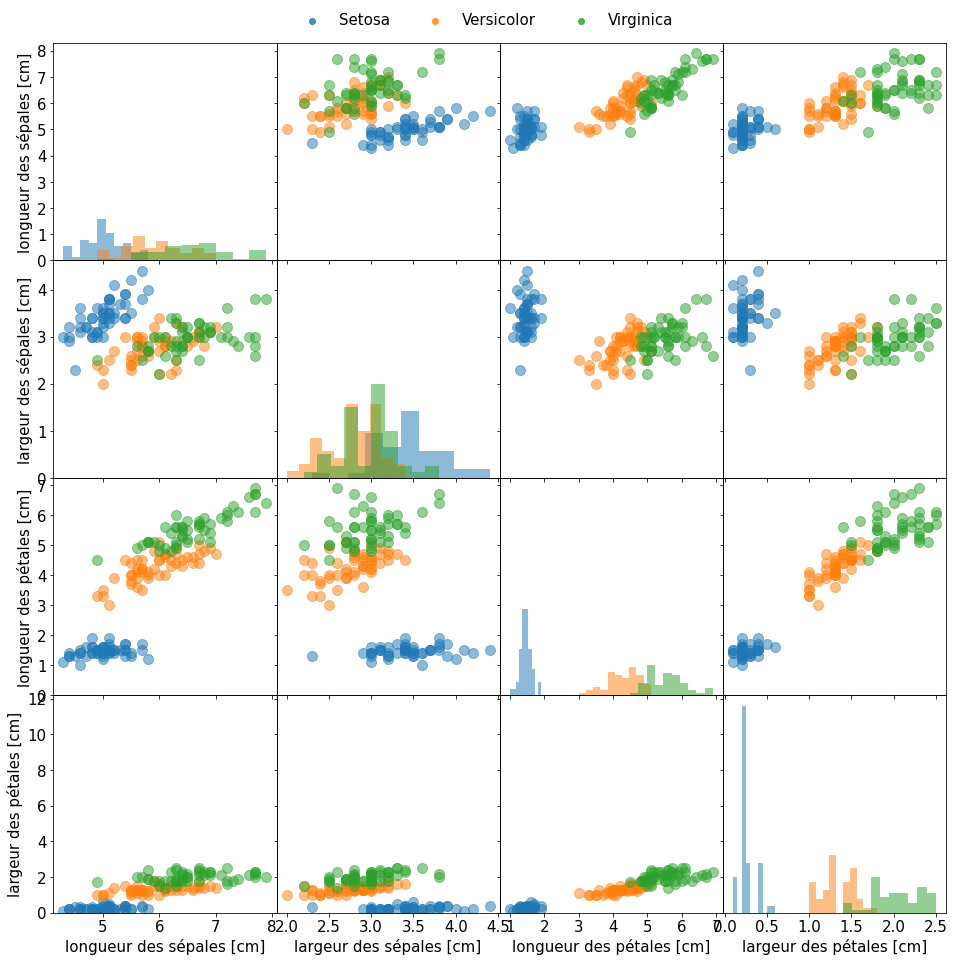

In [13]:
# Changement de taille de police uniquement pour cette figure
with plt.rc_context({"font.size": 15}):
    # Définition d'une grille de sous-figures
    fig, ax = plt.subplots(
        len(labels),
        len(labels),
        sharex="col",
        sharey="row",
        figsize=(4 * len(labels), 4 * len(labels)),
    )

    for l1, d1 in labels.items():
        i1 = list(labels.keys()).index(l1)
        for l2, d2 in labels.items():
            i2 = list(labels.keys()).index(l2)
            for v in df.variety.unique():
                sc = df.variety == v
                if l1 == l2:
                    ax[i1, i2].hist(d1[sc], alpha=0.5, bins=10, density=True)
                else:
                    ax[i1, i2].scatter(d2[sc], d1[sc], s=100, alpha=0.5)
                    ax[-1, i1].set_xlabel(l1)
                    ax[i1, 0].set_ylabel(l1)

    # Création d'une légende à partir d'un scatter plot vide
    for i, v in enumerate(df.variety.unique()):
        plt.scatter([], [], c="C{}".format(i), alpha=0.8, label=v)
    fig.legend(bbox_to_anchor=(0.5, 0.9), loc="center", ncol=len(df.variety.unique()))
    fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

La librairie [`seaborn`](https://seaborn.pydata.org/examples/scatterplot_matrix.html) facilite grandement la manipulation et la représentation de données issues de `pandas.Dataframe`

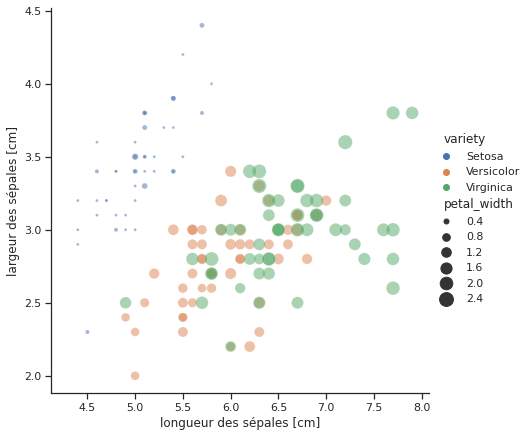

In [14]:
import seaborn as sns

sns.set_theme(style="ticks")

iris = pd.read_csv("./data/iris.csv")

g = sns.relplot(
    data=iris,
    x="sepal_length",
    y="sepal_width",
    hue="variety",
    size="petal_width",
    alpha=0.5,
    sizes=(0, 200),
    height=6,
)
g.set(xlabel="longueur des sépales [cm]", ylabel="largeur des sépales [cm]");

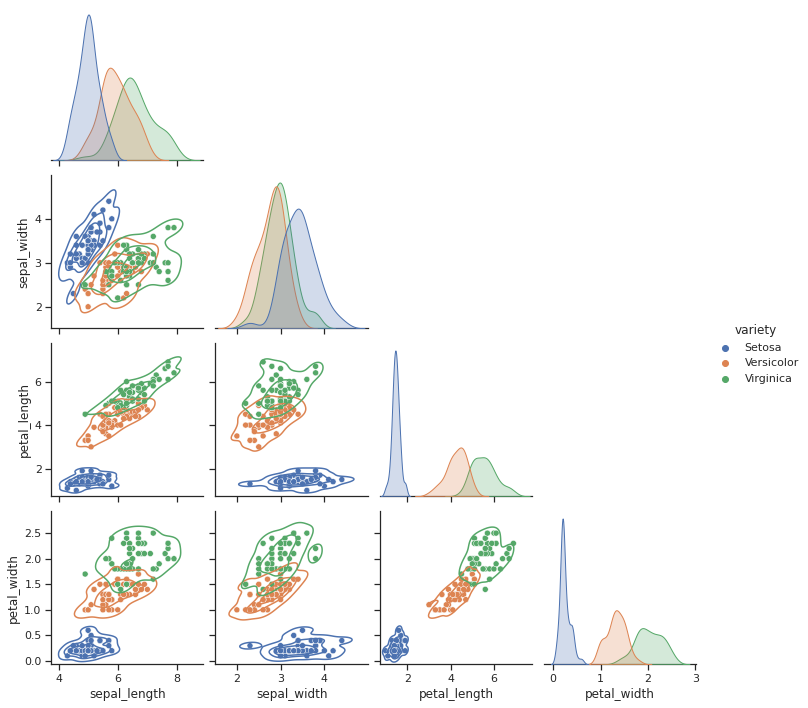

In [15]:
g = sns.pairplot(iris, hue="variety", corner=True)
g.map_lower(sns.kdeplot, levels=4);

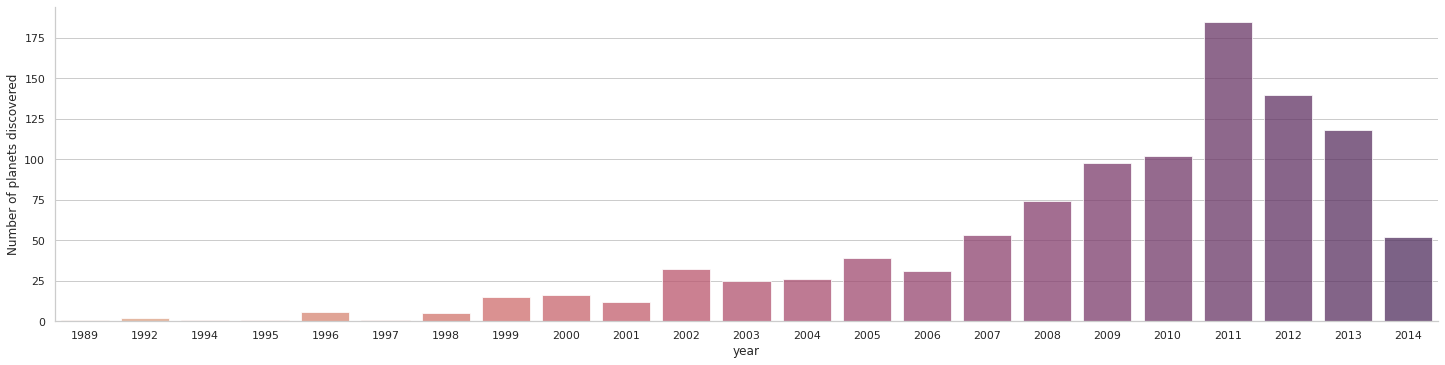

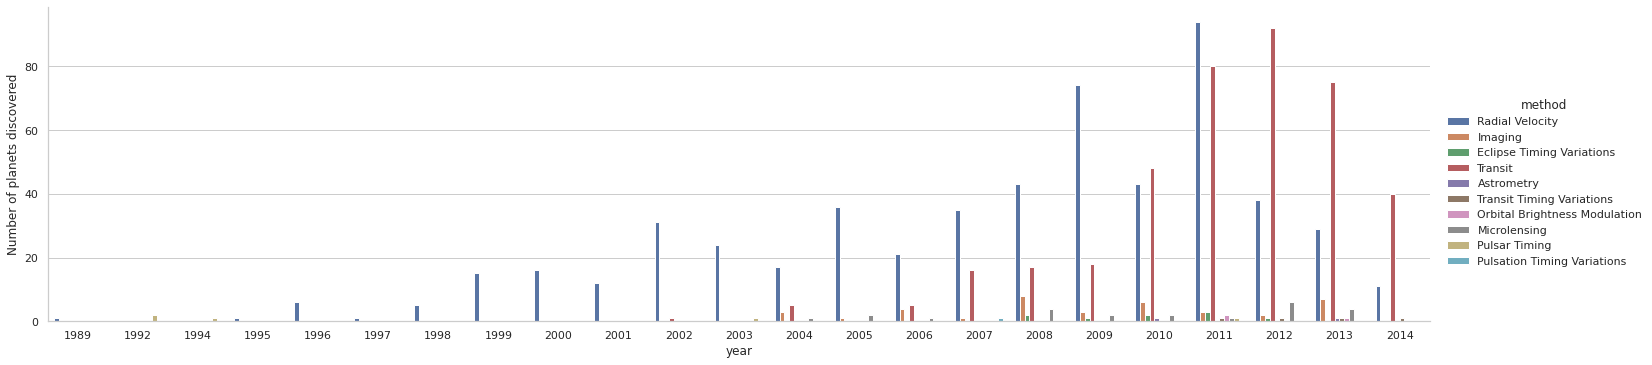

In [16]:
import seaborn as sns

sns.set_theme(style="whitegrid")

g = sns.catplot(x="year", data=planets, aspect=4, kind="count", palette="flare", alpha=0.75)
g.set_ylabels("Number of planets discovered");
g = sns.catplot(x="year", data=planets, aspect=4, kind="count", hue="method")
g.set_ylabels("Number of planets discovered");

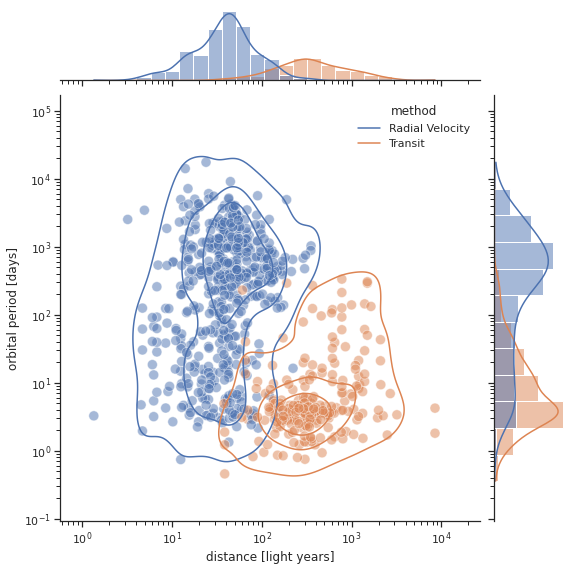

In [17]:
with sns.axes_style("ticks"):
    g = sns.JointGrid(
        data=planets[planets["method"].isin(["Radial Velocity", "Transit"])],
        x="distance",
        y="orbital_period",
        hue="method",
        height=8,
    )
    g.ax_joint.set(
        xscale="log", yscale="log", xlabel="distance [light years]", ylabel="orbital period [days]"
    )
    g.plot_joint(sns.scatterplot, alpha=0.5, s=100)
    g.plot_joint(sns.kdeplot, levels=4)
    g.plot_marginals(sns.histplot, kde=True)